本に書いてあったやつ

In [119]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from tempfile import TemporaryFile
class LogicRegressionGD(object):
    """
    パラメタ
    eta:float 学習率
    n_iter:int トレーニング回数
    ramdom_state:int 重みを初期化する乱数シード
    
    属性
    w_１次配列　適合後の重み
    cost_ : リスト　各エポックでの誤差平方和コスト関数
    
    """
    
    def __init__(self,eta = 0.01,n_iter = 1000,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        """
        パラメタ
        X 配列　形は{n_sample,n_featuers}
        サンプルはサンプルの個数でようはトレーニングデータ
        y 配列のようなデータ構造、shape = {n_sample}
        目的変数
        
        戻り値
        self:object
        """
        # np.random.randomstateで同じ乱数になるようにシードで固定し、rgenにインスタンス化
        rgen = np.random.RandomState(self.random_state)
        #normalで正規分布に従う乱数を作成shape[1]は列の数
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
       # print(self.w_)
        self.cost_ = []
        
        for i in range(self.n_iter):
                net_input = self.net_input(X)
                output = self.activation(net_input)
                erros = (y - output)
                self.w_[1:] += self.eta * X.T.dot(erros)
                self.w_[0] += self.eta * erros.sum()
                #
                cost = -y.dot(np.log(output)) -((1-y).dot(np.log(1-output)))
                #costを追加する
                self.cost_.append(cost)
            
        return self
    
    def net_input(self,X):
        #総入力を計算
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,z):
        return 1. /(1. + np.exp(-np.clip(z,-250,250)))
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,0)
    
    

In [120]:
    rgen = np.random.RandomState(1)
    w = rgen.normal(loc=0.0,scale=0.01,size=44)
    print(w)

[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039 -0.0024937   0.01462108 -0.02060141
 -0.00322417 -0.00384054  0.01133769 -0.01099891 -0.00172428 -0.00877858
  0.00042214  0.00582815 -0.01100619  0.01144724  0.00901591  0.00502494
  0.00900856 -0.00683728 -0.0012289  -0.00935769 -0.00267888  0.00530355
 -0.00691661 -0.00396754 -0.00687173 -0.00845206 -0.00671246 -0.00012665
 -0.0111731   0.00234416  0.01659802  0.00742044 -0.00191836 -0.00887629
 -0.00747158  0.01692455]


In [121]:
class Test(object):
    def __init__(self):
        self.i_var = "nothing"
        self.a = "1"
    def __str__(self):
        return self.i_var

    def examine1(self):
        self.b = "3"
        self.i_var = "examine1"
        self.a = "2"
        return self

    def examine2(self):
        self.i_var = "examine2"
        return self

t1 = Test()
print(t1)
print(t1.examine1())
print(t1.examine2())

nothing
examine1
examine2


[0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log


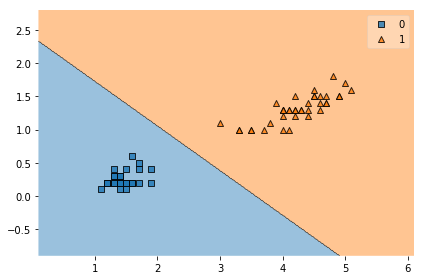

In [124]:
from sklearn.model_selection import train_test_split
# データセットのロード（ダウンロード？）
from sklearn.datasets import load_iris # sklearn.datasets を load_iris という変数で取得
import matplotlib.pyplot as plt # グラフ描写のライブラリー
import matplotlib.patches as mpatches # 可視化
import seaborn as sns # グラフ描写のライブラリー
from matplotlib.colors import ListedColormap # マップ
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import pandas as pd
import numpy as np
iris = datasets.load_iris() # load_iris

#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
#df.tail()
X = iris.data[:,[2,3]]

y = iris.target


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

X_train_01_subset = X_train[(y_train == 1) | (y_train ==0)]
y_train_01_subset = y_train[(y_train == 1) | (y_train ==0)]
print(y_train_01_subset)
lrgd = LogicRegressionGD(eta=0.05,n_iter=100,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X_train_01_subset,y_train_01_subset,clf=lrgd)
plt.tight_layout()
plt.show()


In [125]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])